### 제주도 도로 교통량 예측 AI 경진대회

- https://dacon.io/competitions/official/235985/data

In [2]:
import pandas as pd

data_info = pd.read_csv('./jeju_traffic/data_info.csv')
data_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [ ]:
import gc

def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done')

In [10]:
csv_to_parquet('./jeju_traffic/train.csv', 'train')
csv_to_parquet('./jeju_traffic/test.csv', 'test')

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [3]:
train = pd.read_csv('./jeju_traffic/train.csv')
test = pd.read_csv('./jeju_traffic/test.csv')

In [4]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [5]:
test.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     291241 non-null  object 
 1   base_date              291241 non-null  int64  
 2   day_of_week            291241 non-null  object 
 3   base_hour              291241 non-null  int64  
 4   lane_count             291241 non-null  int64  
 5   road_rating            291241 non-null  int64  
 6   road_name              291241 non-null  object 
 7   multi_linked           291241 non-null  int64  
 8   connect_code           291241 non-null  int64  
 9   maximum_speed_limit    291241 non-null  float64
 10  vehicle_restricted     291241 non-null  float64
 11  weight_restricted      291241 non-null  float64
 12  height_restricted      291241 non-null  float64
 13  road_type              291241 non-null  int64  
 14  start_node_name        291241 non-nu

In [8]:
train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [7]:
test.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64

In [18]:
train.describe()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
count,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4701217.0,4.701217e+06,4701217.0,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06
mean,2.021672e+07,1.192820e+01,1.836651e+00,1.049585e+02,4.762597e-04,2.660218e-01,6.125329e+01,0.0,5.618742e+03,0.0,6.152237e-01,3.338432e+01,1.265217e+02,3.338432e+01,1.265217e+02,4.278844e+01
std,4.555709e+03,6.722092e+00,6.877513e-01,1.840107e+00,2.181818e-02,5.227760e+00,1.213354e+01,0.0,1.395343e+04,0.0,1.211268e+00,1.012015e-01,1.563657e-01,1.011948e-01,1.563519e-01,1.595443e+01
min,2.021090e+07,0.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,3.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.324343e+01,1.261826e+02,3.324343e+01,1.261826e+02,1.000000e+00
25%,2.021110e+07,6.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,5.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.326422e+01,1.264232e+02,3.326422e+01,1.264232e+02,3.000000e+01
50%,2.022013e+07,1.200000e+01,2.000000e+00,1.060000e+02,0.000000e+00,0.000000e+00,6.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.341257e+01,1.265112e+02,3.341257e+01,1.265112e+02,4.300000e+01
75%,2.022050e+07,1.800000e+01,2.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,7.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.347804e+01,1.265840e+02,3.347804e+01,1.265840e+02,5.400000e+01
max,2.022073e+07,2.300000e+01,3.000000e+00,1.070000e+02,1.000000e+00,1.030000e+02,8.000000e+01,0.0,5.000000e+04,0.0,3.000000e+00,3.355608e+01,1.269309e+02,3.355608e+01,1.269309e+02,1.130000e+02


In [19]:
test.describe()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude
count,2.912410e+05,291241.000000,291241.000000,291241.000000,291241.0,291241.0,291241.000000,291241.0,291241.000000,291241.0,291241.000000,291241.000000,291241.000000,291241.000000,291241.000000
mean,2.022082e+07,11.856854,2.021371,105.245948,0.0,0.0,58.771430,0.0,3651.902033,0.0,0.634845,33.361624,126.512946,33.361651,126.512919
std,8.886111e+00,6.803378,0.750898,1.862653,0.0,0.0,11.390743,0.0,11327.618389,0.0,1.225362,0.116064,0.061478,0.116067,0.061344
min,2.022080e+07,0.000000,1.000000,103.000000,0.0,0.0,30.000000,0.0,0.000000,0.0,0.000000,33.243432,126.303780,33.243432,126.303780
25%,2.022081e+07,6.000000,1.000000,103.000000,0.0,0.0,50.000000,0.0,0.000000,0.0,0.000000,33.254214,126.476508,33.254214,126.476508
50%,2.022082e+07,12.000000,2.000000,106.000000,0.0,0.0,60.000000,0.0,0.000000,0.0,0.000000,33.272222,126.512046,33.272222,126.512046
75%,2.022082e+07,18.000000,3.000000,107.000000,0.0,0.0,70.000000,0.0,0.000000,0.0,0.000000,33.492718,126.561830,33.492718,126.561830
max,2.022083e+07,23.000000,3.000000,107.000000,0.0,0.0,80.000000,0.0,50000.000000,0.0,3.000000,33.521399,126.912948,33.521399,126.912948


- 각 피처들 하나씩살펴보기

##### 1. base_hour 시간대

In [22]:
train['base_hour'].value_counts()

15    214541
13    214297
14    214182
12    211833
19    209870
11    208515
16    208420
17    208377
18    207500
10    206316
9     205327
20    205059
21    203585
8     201875
22    200629
7     199061
6     189418
23    184229
1     182353
5     181128
2     169322
4     165284
3     155938
0     154158
Name: base_hour, dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)


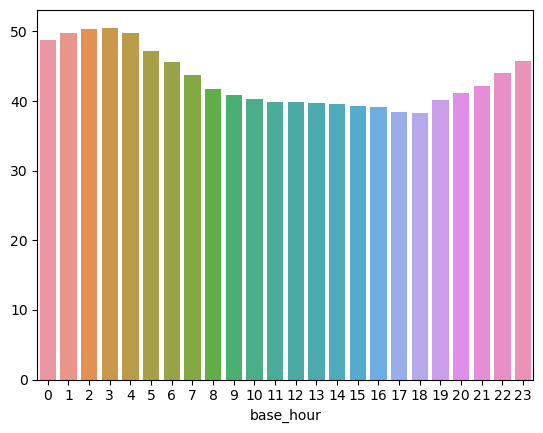

In [28]:
import seaborn as sns
base_hour = train.groupby('base_hour')['target'].mean()
print(sns.barplot(x=base_hour.index, y=base_hour.values ))

- 0~5시가 가장 평균 속도가 높음(차량 수 상대적으로 ↓)


- 17~18시가 평균 속도 가장 낮음(차량 수 상대적으로 ↑)

##### 2. lane_count 차로 수

In [30]:
train['lane_count'].value_counts()

2    2352092
1    1558531
3     790594
Name: lane_count, dtype: int64

<AxesSubplot: xlabel='lane_count'>

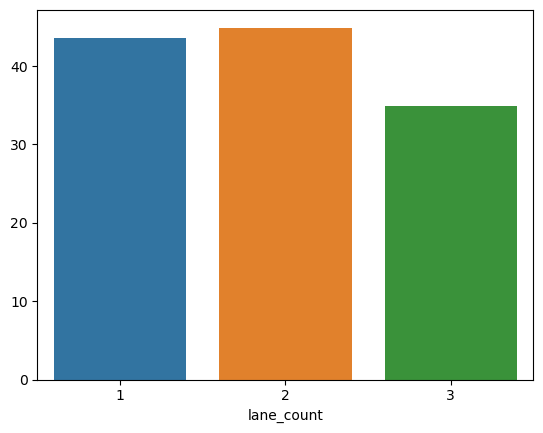

In [32]:
lane_count = train.groupby('lane_count')['target'].mean()
sns.barplot(x=lane_count.index, y=lane_count.values)

- 차로 수가 2개일 때, 평균 속도가 상대적으로 높음


- 차로 수가 3개일 때는 상대적으로 낮음

##### 3. road_rating 도로 등급

2    2352092
1    1558531
3     790594
Name: lane_count, dtype: int64


<AxesSubplot: xlabel='road_rating'>

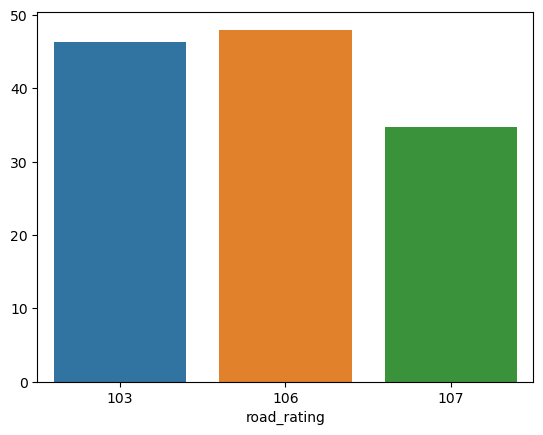

In [33]:
print(train['lane_count'].value_counts())

road_rating = train.groupby('road_rating')['target'].mean()
sns.barplot(x=road_rating.index, y=road_rating.values)

- 도로등급: 103(일반 국도), 106(지방도), 107(시/군도)


- 도로 등급이 106(지방도)일 때, 평균 속도가 상대적으로 높음


- 도로 등급이 107(시/군도)일 때, 상대적으로 낮음

##### 4. multi_linked 중용구간

In [34]:
train['multi_linked'].value_counts()

0    4698978
1       2239
Name: multi_linked, dtype: int64

- 중용구간이 '있음'과 '없음'이 차이가 매우 큼 >> 제거하는게 좋을 듯

In [40]:
train = train.drop('multi_linked', axis=1)
test = test.drop('multi_linked', axis=1)

##### 5. connect_code 연결로 코드

In [35]:
train['connect_code'].value_counts()

0      4689075
103      12142
Name: connect_code, dtype: int64

- 연결로 코드 0(없음)과 103(있음)의 차이가 매우 큼 >> 마찬가지로 제거

In [41]:
train = train.drop('connect_code', axis=1)
test = test.drop('connect_code', axis=1)

##### 6. maximum_speed_limit 최대 속도 제한

maximum_speed_limit
30.0    32.220825
40.0    62.774080
50.0    35.492231
60.0    42.316287
70.0    41.366208
80.0    60.703696
Name: target, dtype: float64


<AxesSubplot: xlabel='maximum_speed_limit'>

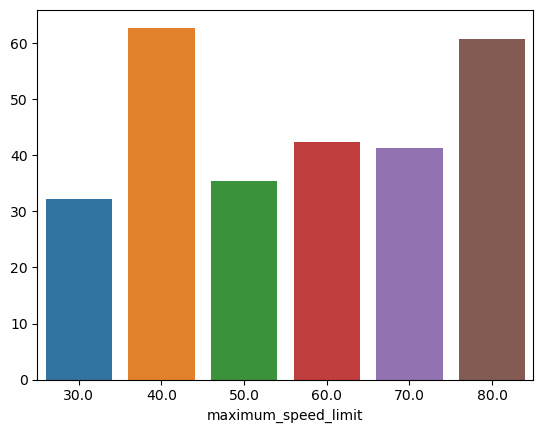

In [49]:
train['maximum_speed_limit'].value_counts()
msl = train.groupby('maximum_speed_limit')['target'].mean()
print(msl)
sns.barplot(x=msl.index, y=msl.values)

- 최대 속도 제한이 40, 80인 도로에서 평균 속도가 상대적으로 높음


- 최대 속도 제한이 30인 도로에서 상대적으로 낮음

<AxesSubplot: xlabel='maximum_speed_limit', ylabel='target'>

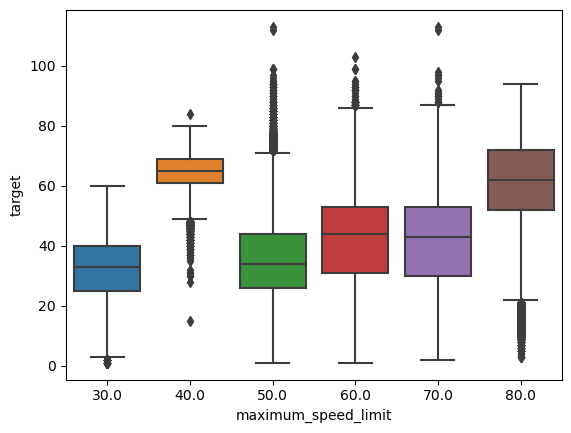

In [51]:
sns.boxplot(train, x='maximum_speed_limit', y='target')

- 각 속도 제한 마다 이상치가 매우 많음

##### 7. vehicle_restricted 통과 제한 차량

In [39]:
train['vehicle_restricted'].value_counts()

0.0    4701217
Name: vehicle_restricted, dtype: int64

- 유일값이 0.0으로 1개임 >> 제거

In [42]:
train = train.drop('vehicle_restricted', axis=1)
test = test.drop('vehicle_restricted', axis=1)

##### 8. weight_restricted	통과 제한 하중

In [48]:
print(train['weight_restricted'].value_counts())
print(train.groupby('weight_restricted')['target'].mean())

0.0        4032874
43200.0     410361
32400.0     239305
50000.0      18677
Name: weight_restricted, dtype: int64
weight_restricted
0.0        40.955696
32400.0    47.453350
43200.0    57.883888
50000.0    47.088665
Name: target, dtype: float64


- 통과 제한 하중이 없을 때(0일 때) 평균 속도가 높음

##### 9. height_restricted 통과 제한 높이

In [45]:
train['height_restricted'].value_counts()

0.0    4701217
Name: height_restricted, dtype: int64

- 유일값이 0.0으로 1개임 >> 제거

In [46]:
train = train.drop('height_restricted', axis=1)
test = test.drop('height_restricted', axis=1)

##### 10. road_type 도로 유형

0    3737117
3     964100
Name: road_type, dtype: int64
road_type
0    41.160930
3    49.097125
Name: target, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)


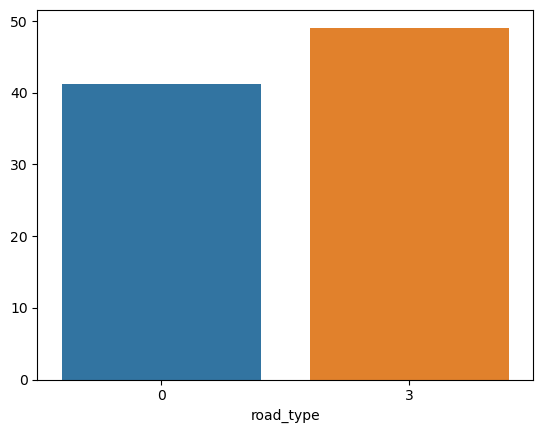

In [53]:
print(train['road_type'].value_counts())
road_type = train.groupby('road_type')['target'].mean()
print(road_type)
print(sns.barplot(x=road_type.index, y=road_type.values))

- 도로 유형이 3일 때 평균 속도가 상대적으로 높음

##### 11. road_name 도로명

In [56]:
print(train['road_name'].value_counts())

일반국도12호선    1046092
-            569463
일반국도16호선     554510
일반국도95호선     248181
일반국도11호선     215701
             ...   
애원로            7718
아봉로            7342
남조로            6813
호서중앙로          2819
호근로             587
Name: road_name, Length: 61, dtype: int64


- 도로명 결측치가 569,463개 있음

##### 12. day_of_week 요일

In [66]:
print(train['day_of_week'].value_counts())
print(train.groupby('day_of_week')['target'].mean())

day = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

import matplotlib.pyploy as plt


sns.barplot(x='')

금    684024
수    675583
목    674070
일    673632
토    669767
화    662498
월    661643
Name: day_of_week, dtype: int64
day_of_week
금    42.450328
목    42.768345
수    42.770372
월    42.761365
일    43.179300
토    42.894117
화    42.699198
Name: target, dtype: float64


ValueError: DataFrame constructor not properly called!

In [59]:
X_train = train.drop(['id', 'base_date', 'road_name', 'start_node_name', 'end_node_name'], axis=1)
y_train = train['target']